In [7]:
### Term Deposit Marketing

In [49]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.model_selection import cross_val_score

In [8]:
# Importing Data

In [9]:
dt = pd.read_csv('/Users/mertmusaoglu/Downloads/term-deposit-marketing-2020.csv')

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [13]:
## Data Preparation

In [14]:
dt['loan'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
dependents_mapper = {'yes': 1, 'no': 0}
dt['loan'].replace(dependents_mapper, inplace=True)
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,0,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,0,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,1,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,0,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,0,unknown,5,may,198,1,no


In [16]:
dt['y'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
dt['y'].replace(dependents_mapper, inplace=True)
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,0,unknown,5,may,198,1,0


In [18]:
dt['default'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
dt['default'].replace(dependents_mapper, inplace=True)
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,yes,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,yes,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,yes,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,yes,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,no,0,unknown,5,may,198,1,0


In [20]:
dt['housing'].unique()

array(['yes', 'no'], dtype=object)

In [21]:
dt['housing'].replace(dependents_mapper, inplace=True)
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [22]:
dt['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [23]:
emb_dummies = pd.get_dummies(dt['education'], drop_first=False, prefix='Education_Level')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('education', axis=1, inplace=True)

In [24]:
dt.head()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,y,Education_Level_primary,Education_Level_secondary,Education_Level_tertiary,Education_Level_unknown
0,58,management,married,0,2143,1,0,unknown,5,may,261,1,0,0,0,1,0
1,44,technician,single,0,29,1,0,unknown,5,may,151,1,0,0,1,0,0
2,33,entrepreneur,married,0,2,1,1,unknown,5,may,76,1,0,0,1,0,0
3,47,blue-collar,married,0,1506,1,0,unknown,5,may,92,1,0,0,0,0,1
4,33,unknown,single,0,1,0,0,unknown,5,may,198,1,0,0,0,0,1


In [25]:
dt['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
emb_dummies = pd.get_dummies(dt['contact'], drop_first=False, prefix='Contact_Type')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('contact', axis=1, inplace=True)
dt.head()

,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,y,Education_Level_primary,Education_Level_secondary,Education_Level_tertiary,Education_Level_unknown,Contact_Type_cellular,Contact_Type_telephone,Contact_Type_unknown
0,58,management,married,0,2143,1,0,5,may,261,1,0,0,0,1,0,0,0,1
1,44,technician,single,0,29,1,0,5,may,151,1,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,0,2,1,1,5,may,76,1,0,0,1,0,0,0,0,1
3,47,blue-collar,married,0,1506,1,0,5,may,92,1,0,0,0,0,1,0,0,1
4,33,unknown,single,0,1,0,0,5,may,198,1,0,0,0,0,1,0,0,1


In [29]:
dt['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [30]:
emb_dummies = pd.get_dummies(dt['marital'], drop_first=False, prefix='Marital_State=')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('marital', axis=1, inplace=True)
dt.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,Education_Level_primary,Education_Level_secondary,Education_Level_tertiary,Education_Level_unknown,Contact_Type_cellular,Contact_Type_telephone,Contact_Type_unknown,Marital_State=_divorced,Marital_State=_married,Marital_State=_single
0,58,management,0,2143,1,0,5,may,261,1,...,0,0,1,0,0,0,1,0,1,0
1,44,technician,0,29,1,0,5,may,151,1,...,0,1,0,0,0,0,1,0,0,1
2,33,entrepreneur,0,2,1,1,5,may,76,1,...,0,1,0,0,0,0,1,0,1,0
3,47,blue-collar,0,1506,1,0,5,may,92,1,...,0,0,0,1,0,0,1,0,1,0
4,33,unknown,0,1,0,0,5,may,198,1,...,0,0,0,1,0,0,1,0,0,1


In [31]:
dt['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [32]:
emb_dummies = pd.get_dummies(dt['job'], drop_first=False, prefix='Job=')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('job', axis=1, inplace=True)
dt.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,Job=_entrepreneur,Job=_housemaid,Job=_management,Job=_retired,Job=_self-employed,Job=_services,Job=_student,Job=_technician,Job=_unemployed,Job=_unknown
0,58,0,2143,1,0,5,may,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,may,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,may,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,may,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,may,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
dt['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81])

In [34]:
dt['age'] = pd.cut(dt['age'], [0,20,40,60,80,100], include_lowest=True)
dt.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,Job=_entrepreneur,Job=_housemaid,Job=_management,Job=_retired,Job=_self-employed,Job=_services,Job=_student,Job=_technician,Job=_unemployed,Job=_unknown
0,"(40.0, 60.0]",0,2143,1,0,5,may,261,1,0,...,0,0,1,0,0,0,0,0,0,0
1,"(40.0, 60.0]",0,29,1,0,5,may,151,1,0,...,0,0,0,0,0,0,0,1,0,0
2,"(20.0, 40.0]",0,2,1,1,5,may,76,1,0,...,1,0,0,0,0,0,0,0,0,0
3,"(40.0, 60.0]",0,1506,1,0,5,may,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"(20.0, 40.0]",0,1,0,0,5,may,198,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
emb_dummies = pd.get_dummies(dt['age'], drop_first=False, prefix='Age')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('age', axis=1, inplace=True)
dt.head()

,default,balance,housing,loan,day,month,duration,campaign,y,Education_Level_primary,...,Job=_services,Job=_student,Job=_technician,Job=_unemployed,Job=_unknown,"Age_(-0.001, 20.0]","Age_(20.0, 40.0]","Age_(40.0, 60.0]","Age_(60.0, 80.0]","Age_(80.0, 100.0]"
0,0,2143,1,0,5,may,261,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,29,1,0,5,may,151,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2,1,1,5,may,76,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1506,1,0,5,may,92,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,5,may,198,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [36]:
dt['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [37]:
emb_dummies = pd.get_dummies(dt['month'], drop_first=False, prefix='Month')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('month', axis=1, inplace=True)
dt.head()

,default,balance,housing,loan,day,duration,campaign,y,Education_Level_primary,Education_Level_secondary,...,Month_aug,Month_dec,Month_feb,Month_jan,Month_jul,Month_jun,Month_mar,Month_may,Month_nov,Month_oct
0,0,2143,1,0,5,261,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,29,1,0,5,151,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,2,1,1,5,76,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1506,1,0,5,92,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,5,198,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
emb_dummies = pd.get_dummies(dt['day'], drop_first=False, prefix='Day=')
dt = pd.concat([dt, emb_dummies], axis=1)
dt.drop('day', axis=1, inplace=True)
dt.head()

,default,balance,housing,loan,duration,campaign,y,Education_Level_primary,Education_Level_secondary,Education_Level_tertiary,...,Day=_22,Day=_23,Day=_24,Day=_25,Day=_26,Day=_27,Day=_28,Day=_29,Day=_30,Day=_31
0,0,2143,1,0,261,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,29,1,0,151,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,1,76,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1506,1,0,92,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,198,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Launching the Data For the Models

In [40]:
exp_reg = setup(dt, target='y')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5588
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(40000, 76)"
4,Missing Values,False
5,Numeric Features,72
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [41]:
#Creating the Logistic Regression Model

In [54]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9321,0.9140,0.2333,0.5600,0.3294,0.3000
1,0.9357,0.9072,0.2623,0.6400,0.3721,0.3444
2,0.9381,0.9296,0.2787,0.6800,0.3953,0.3687
3,0.9381,0.9168,0.3607,0.6286,0.4583,0.4280
4,0.9298,0.9057,0.2459,0.5357,0.3371,0.3053
5,0.9333,0.8762,0.2295,0.6087,0.3333,0.3057
6,0.9226,0.9087,0.1967,0.4286,0.2697,0.2347
7,0.9274,0.9232,0.2459,0.5000,0.3297,0.2960
8,0.9357,0.9230,0.3115,0.6129,0.4130,0.3828
9,0.9392,0.9060,0.2833,0.6800,0.4000,0.3737


In [45]:
#Predicting the Test Dataset

In [59]:
prediction = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9297,0.9091,0.2375,0.5345,0.3289,0.2976


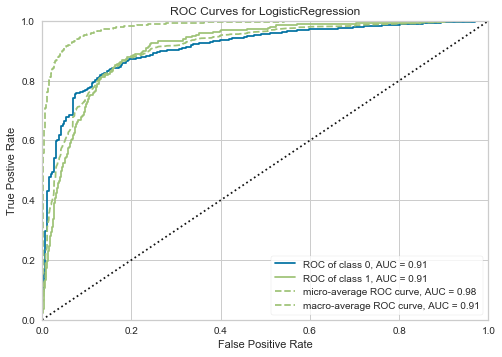

In [60]:
plot_model(model)

In [ ]:
#Evaluating the model

In [61]:
print(cross_val_score(model, X,y, cv=5))

[0.933125 0.924    0.896    0.852625 0.854125]


In [62]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Customers Should be Focused On
#40+ Years old Customers
#Customers with Primary Education Level
#Customers don't have house loans

#When The Customers Buy?
##In the Spring Months (Specially April and November)